In [157]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import numba as nb
import matplotlib.pyplot as plt

from scipy import optimize
from consav import linear_interp

# from BufferStockModel import ConSavModelClass
from FEmodel import FEModelClass


# Set the number of threads in numba
# nb.set_num_threads(4)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


To add in the model
- Finite lifetime
- Individual $\beta$'s
- Individual innate ability
- Individual choice of level and shape

Solve the model

In [158]:
model = FEModelClass()

In [159]:
model.solve()

last period solved in 2.5 secs
first period problem solved in 0.0 secs
model solved in 8.2 secs


In [160]:
sol = model.sol
par = model.par

Plot the policy functions for $\alpha^l$ and $\alpha^s$ as a function of $\beta$ and $\tilde{\alpha}$

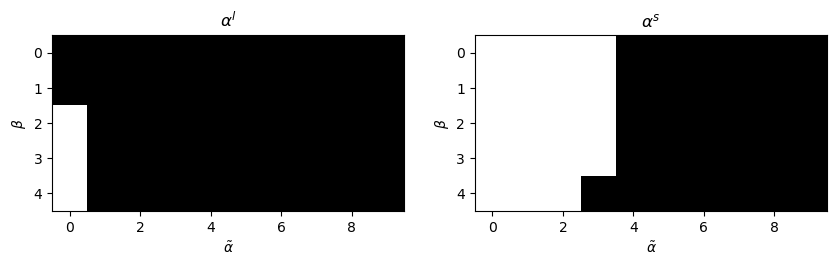

In [161]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)

ax.imshow(sol.alpha_l,cmap='binary')
ax.set_xlabel(r'$\tilde{\alpha}$')
ax.set_ylabel(r'$\beta$')
ax.set_title(r'$\alpha^l$')

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(sol.alpha_s, cmap='binary')
ax2.set_xlabel(r'$\tilde{\alpha}$')
ax2.set_ylabel(r'$\beta$')
ax2.set_title(r'$\alpha^s$')

plt.show()

In [162]:
sol.alpha_l

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

Check how the policy functions look

Split by $\beta$

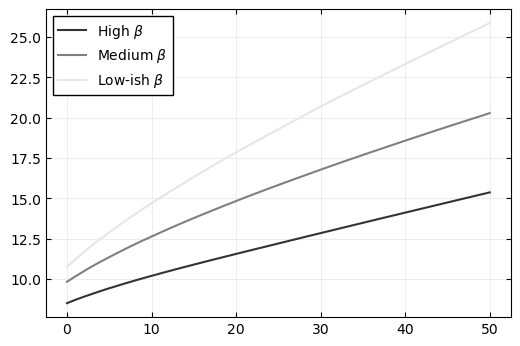

In [163]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.plot(par.a_grid,sol.c[0,-1,-1,-1,-1,:], color = '0.2', label = r'High $\beta$',zorder=2)
ax.plot(par.a_grid,sol.c[0,-3,-1,-1,-1,:], color = '0.5', label = r'Medium $\beta$',zorder=2)
ax.plot(par.a_grid,sol.c[0,0,-1,-1,-1,:], color = '0.9', label = r'Low-ish $\beta$',zorder=2)

# ax.set_ylim(0,2.1)
# ax.set_xlim(0,5)

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')
ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)

plt.show()

Split by $\alpha$

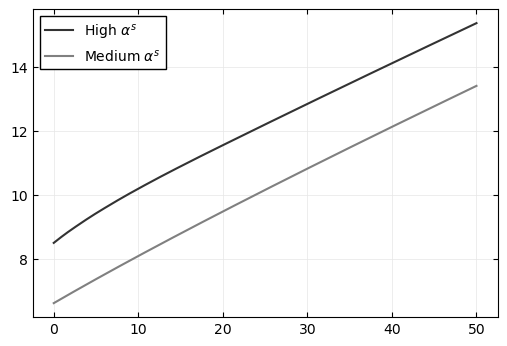

In [164]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.plot(par.a_grid,sol.c[0,-1,-1,1,-1,:], color = '0.2', label = r'High $\alpha^s$',zorder=2)
ax.plot(par.a_grid,sol.c[0,-1,-1,0,-1,:], color = '0.5', label = r'Medium $\alpha^s$',zorder=2)
# ax.plot(par.a_grid,sol.c[0,-1,-1,-1,-1,:], color = '0.9', label = r'Low-ish $\beta$',zorder=2)

# ax.set_ylim(0,2.1)
# ax.set_xlim(0,5)

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')
ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)

plt.show()

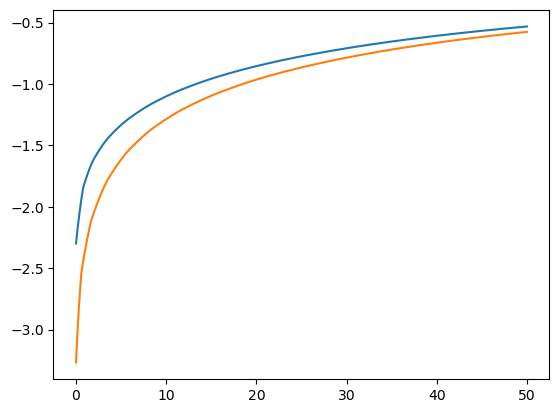

In [165]:
plt.plot(par.a_grid,sol.v[0,-1,1,1,3,:])
plt.plot(par.a_grid,sol.v[0,-1,1,1,2,:])

In [166]:
model = FEModelClass()
model.solve(do_print = True)

last period solved in 3.2 secs
first period problem solved in 0.0 secs
model solved in 8.6 secs


In [167]:
model.solve(do_print = True)

last period solved in 0.0 secs
first period problem solved in 0.0 secs
model solved in 0.6 secs


In [168]:
model.prepare_simulate()

model prepared for simulation in 0.0


In [178]:
model.simulate()

model simulated in 0.0 secs


In [170]:
par = model.par
sol = model.sol
sim = model.sim

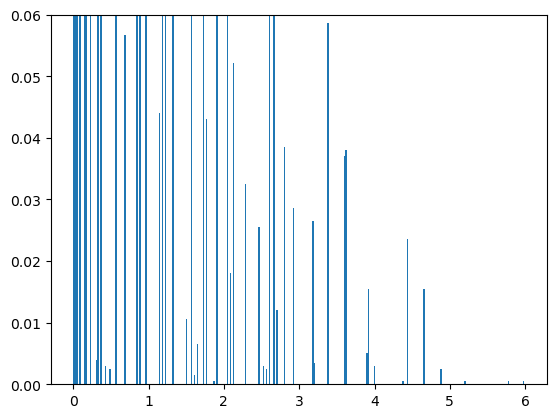

In [171]:
plt.hist(sim.a[0,:],bins=300,density=True)
plt.ylim(0,.06)
plt.show()

In [172]:
sim.a[-1]

array([ 0.00000000e+00, -4.44089210e-16,  0.00000000e+00, ...,
        0.00000000e+00,  8.88178420e-16, -1.77635684e-15])

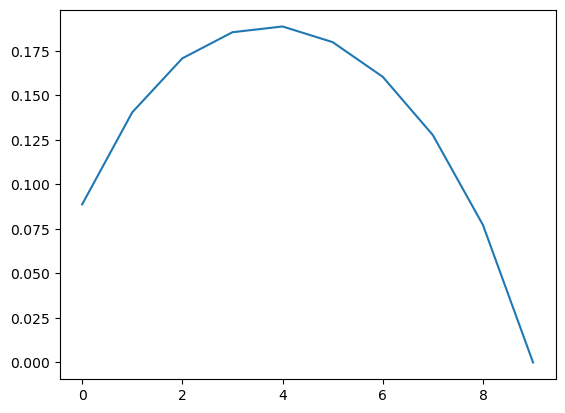

In [173]:
plt.plot(np.mean(sim.a,axis=1))
# plt.ylim(0,1)

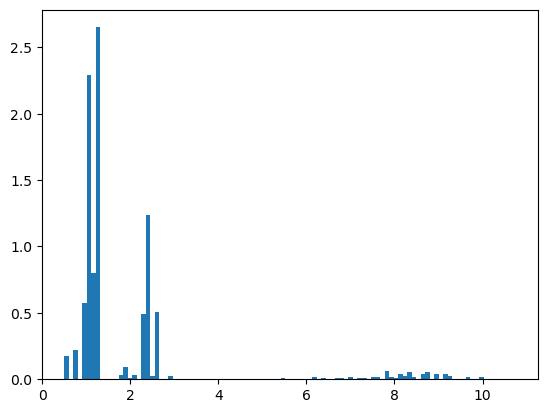

In [175]:
plt.hist(sim.c[0,:], bins = 100, density=True)
# plt.xlim(.0,2.0)
plt.show()

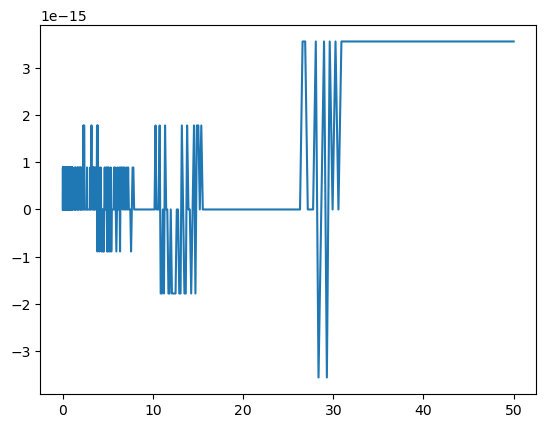

In [176]:
plt.plot(par.a_grid,sol.c[-1,-1,1,1,2,:]-(1+par.r)*par.a_grid - par.w*par.z_grid[2] - par.alpha_l_grid[1] - (par.H-1)*par.alpha_s_grid[1])


# plt.ylim(0.4,2.0)